ESPESOR VARIABLE 

-0.07029829312937798
Slope1:-2.949003431383155e-06+/-2.1191103837325801e-07
Intercept1:-0.4045458815384686+/-0.14508556987672036
0.0
Slope1:-3.20003115748242e-06+/-1.0980460791576203e-07
Intercept1:-0.4360910648086584+/-0.0751780758418415
0.07029829312937798
Slope1:-3.1992837519795136e-06+/-2.473960925953622e-07
Intercept1:-0.3735027227829974+/-0.16938052569139586
0.1405751727176739
Slope1:-3.005556433020981e-06+/-1.8322862075916234e-07
Intercept1:-0.33279232641706935+/-0.12544806096294073
0.21080923174657776
Slope1:-2.729372252164906e-06+/-2.85904461090563e-07
Intercept1:-0.526624998539388+/-0.1957454032883243
0.28097907624133667
Slope1:-2.5454637001839413e-06+/-1.266957941467057e-07
Intercept1:-0.6186216045411155+/-0.08674268049397713
0.35106333178756705
Slope1:-2.51467928372949e-06+/-1.3102651797444253e-07
Intercept1:-0.7018023040270864+/-0.08970772440744786
0.4210406500421081
Slope1:-2.664276847480958e-06+/-2.4450294531619596e-07
Intercept1:-0.6852141412746763+/-0.1673997231576658


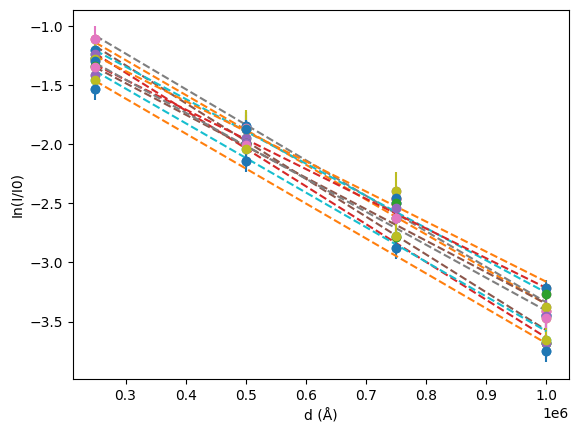

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
Intensidades={}
I0=[]
de=2.014


files=['sin muestra.txt','zn 0.025','zn 0.05','zn 0.075','zn 0.1.txt']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
labels=['0.0','0.025','0.05','0.075','0.1']
d=np.array([0.025e7,0.05e7,0.075e7,0.1e7])

mus=[]
lambdas=[]

for i in files:

    
    

    with open(i, 'r') as file:
        next(file)
        next(file)
        next(file)

        

        reader = csv.reader(file, delimiter='\t')
        angles=[]
        erre=[]
        p=0
        for row in reader:
            
            tetha=np.deg2rad(float(row[0].replace(",", "."))-7)
            lambda_= de*np.sin(tetha)*2
            if lambda_ not in Intensidades:
                Intensidades[lambda_]=[]
            if i!= 'sin muestra.txt':
                    Intensidades[lambda_].append((float(row[1].replace(",", ".")))/I0[p])
                   
            else:
                    I0.append(float(row[1].replace(",", ".")))

            p+=1

for i in Intensidades.keys():

    intensidad=np.log(np.array(Intensidades[i]))

    A1 = np.vstack([d, np.ones(len(d))]).T
    m1, c1 = np.linalg.lstsq(A1, intensidad, rcond=None)[0]

    mus.append(m1)
    lambdas.append(np.float64(i))

    residuals = intensidad - (m1 * d + c1)
    residual_sum_of_squares = np.sum(residuals ** 2)
    std_err = np.sqrt(residual_sum_of_squares / (len(d) - 2)) 
    std_err_slope = std_err / np.sqrt(np.sum((d - np.mean(d)) ** 2)) 
    std_err_intercept = std_err_slope * np.sqrt(np.sum(d ** 2) / len(d))
    print(i)                                       
    print("Slope1:" + str(m1) + "+/-"+ str(std_err_slope))
    print("Intercept1:"+ str(c1)+"+/-"+ str(std_err_intercept))
    plt.errorbar(d, intensidad, yerr=std_err, fmt='o')
    plt.plot(d, m1*d + c1, linestyle='--')
    plt.scatter(d, intensidad)




plt.xlabel('d (Å)')
plt.ylabel('In(I/I0)')
plt.show()
    



mu vs lambda

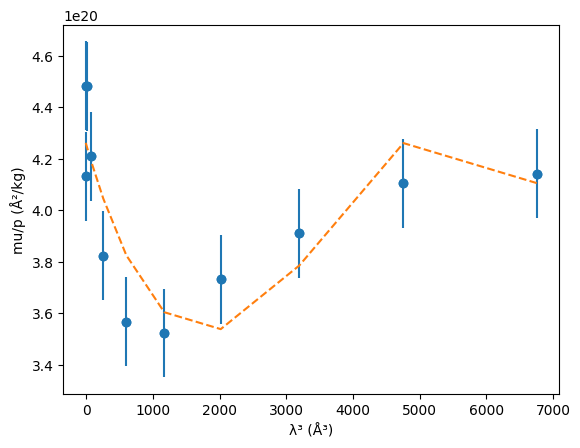

In [2]:


mus=np.array(mus)/-7138e-30
lambdas=np.power(np.array(lambdas), 3)*(30**3)

coefficients = np.polyfit(lambdas, mus, 3)
p = np.poly1d(coefficients)
y_fit = p(lambdas)
residuals = mus - y_fit
error_values = np.std(residuals)


plt.errorbar(lambdas, mus, yerr=error_values, fmt='o')
plt.plot(lambdas, y_fit, linestyle='--')
plt.scatter(lambdas, mus)

plt.xlabel('λ³ (Å³)')
plt.ylabel('mu/p (Å²/kg)')
plt.show()




















